In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
import scipy.io
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
def Reconstruct(compdata, data):
    noncomp = [element for element in data[:, 0] if element not in compdata[:, 0]]
    interpolate = []
    for x in noncomp:
        y = EstimateY(x, compdata)
        interpolate.append([x, y])

    interpolate = np.array(interpolate).reshape(-1, 2)
    Reconstructed = np.append(interpolate, compdata, axis = 0)
    Reconstructed = Reconstructed[Reconstructed[:, 0].argsort()]
    return Reconstructed

In [ ]:
def EstimateY(x, compdata):
    upper, lower = Bounds(x, compdata)
    slope = (upper[1] - lower[1])/(upper[0] - lower[0])
    datapointY = slope * (x - lower[0]) + lower[1]
    return datapointY


In [ ]:
def Bounds(datapoint, compdata):
    upper = data[-1]
    lower = data[0]
    for i in range(len(compdata)):
        if compdata[i, 0] > datapoint:
            upper = deepcopy(compdata[i])
            break
    for i in range(len(compdata)):
        if compdata[len(compdata) - i - 1, 0] < datapoint:
            lower = deepcopy(compdata[len(compdata) - i - 1])
            break
    return upper, lower

In [ ]:
def TurningPoinT(data):
    compresseddata = []
    compresseddata.append(data[0])
    if len(data) == 3:
        if ((data[1][1] - data[0][1]) * (data[2][1] - data[1][1]) > 0):
            compresseddata.append(data[2])
        else:
            compresseddata.append(data[1])
    elif len(data) == 2:
        compresseddata.append(data[1])
    return compresseddata

In [ ]:
def CompressDatA(data):
    comp = []
    comp.append(data[0])
    data = deepcopy(data[1:])
    while(len(data)>2):    
        segment = [comp[-1], data[0], data[1]]
        comp.pop();
        for point in TurningPoinT(segment):
            comp.append(point)
        data = deepcopy(data[2:])
    if len(data) == 2:
        comp.append(data[0])
        comp.append(data[1])
    elif len(data) == 1:
        comp.append(data[0])
    return np.array(comp)

In [ ]:
def Accuracy(compdata, data, Reconstructed):
    CR = len(compdata) / len(data)
    error = deepcopy(np.sqrt(np.sum((Reconstructed[:, 1] - data[:, 1]) ** 2)))
    energy = deepcopy(np.sqrt(np.sum((data[:, 1]) ** 2)))
    prd = error / energy
    print(f"CR: {1 / CR}")
    print(f"PRD: {prd * 100} %")

In [ ]:
def ECG():
    data = scipy.io.loadmat('/content/drive/MyDrive/Depo/PhysioNet/223m (6).mat')['val'][0][0:500]
    data = data.reshape(-1, 1)
    x = np.arange(0, len(data), 1).reshape(-1, 1)
    data = np.append(x, data, axis= 1)
    return data

In [ ]:
def EEG():
    data = np.array(pd.read_csv('/content/drive/MyDrive/Depo/PhysioNet/Auditory evoked potential EEG-Biometric dataset2.csv', header=None))[0:500]
    scaler.fit(data)
    data = scaler.transform(data)
    data = data * 1000
    x = np.arange(0, len(data), 1).reshape(-1, 1).astype(int)
    data = np.append(x, data.astype(int), axis= 1)
    return data

In [ ]:
data = ECG()

Text(0.5, 1.0, 'Original Signal')

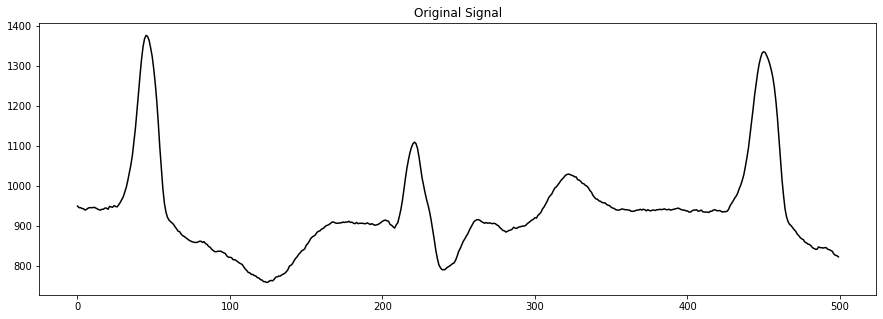

In [ ]:
plt.figure(figsize= (15, 5))
plt.plot(data[:, 0], data[:, 1], c= 'black')
plt.title('Original Signal')

In [ ]:
compdata = CompressDatA(data)


Text(0.5, 1.0, 'Compressed Signal')

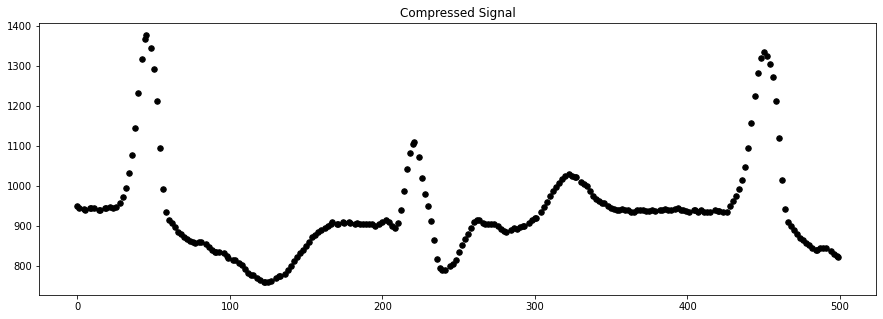

In [ ]:
plt.figure(figsize= (15, 5))
plt.scatter(compdata[:, 0], compdata[:, 1], s= 30, c= 'black')
plt.title('Compressed Signal')

In [ ]:
Reconstructed = Reconstruct(data, compdata)

Text(0.5, 1.0, 'Reconstructed Signal')

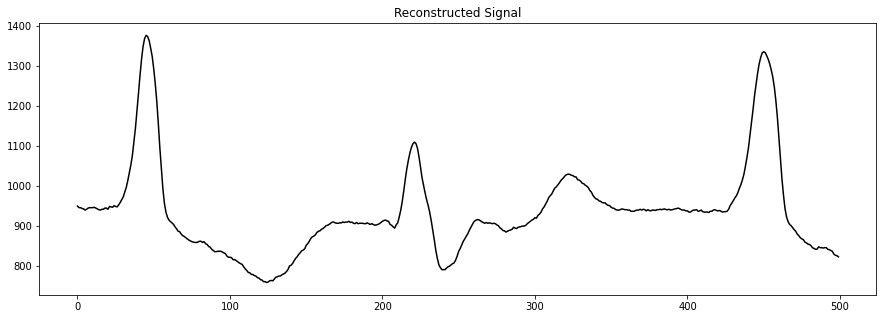

In [ ]:
plt.figure(figsize= (15, 5))
plt.plot(Reconstructed[:, 0], Reconstructed[:, 1], c= 'black')
plt.title('Reconstructed Signal')

In [ ]:
Accuracy(compdata, data, Reconstructed)

CR: 1.9920318725099602
PRD: 0.0 %


Text(0.5, 1.0, 'Original Signal')

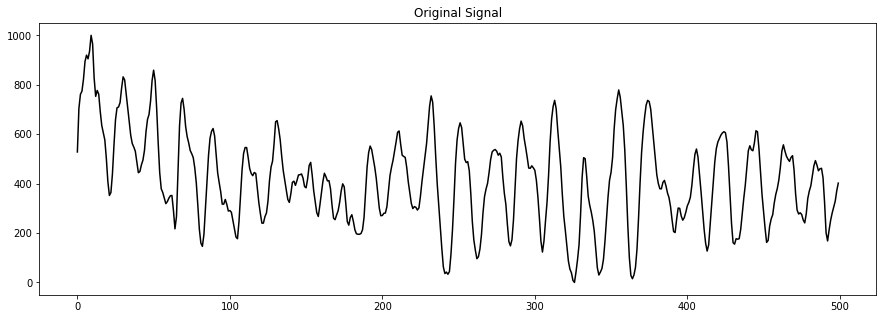

In [ ]:
data = EEG()
plt.figure(figsize= (15, 5))
plt.plot(data[:, 0], data[:, 1], c= 'black')
plt.title('Original Signal')

Text(0.5, 1.0, 'Compressed Signal')

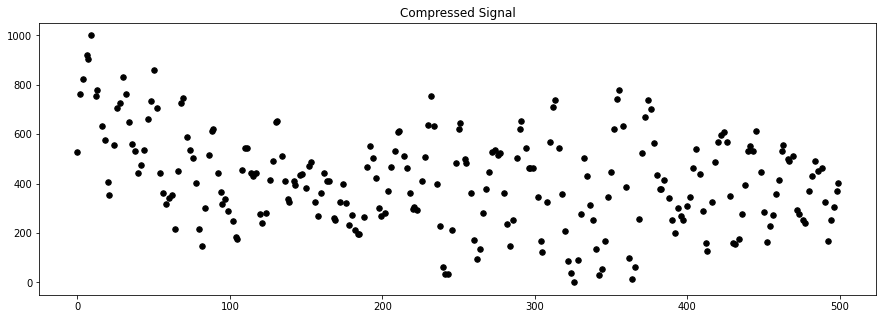

In [ ]:
compdata = CompressDatA(data)
plt.figure(figsize= (15, 5))
plt.scatter(compdata[:, 0], compdata[:, 1], s= 30, c= 'black')
plt.title('Compressed Signal')

Text(0.5, 1.0, 'Reconstructed Signal')

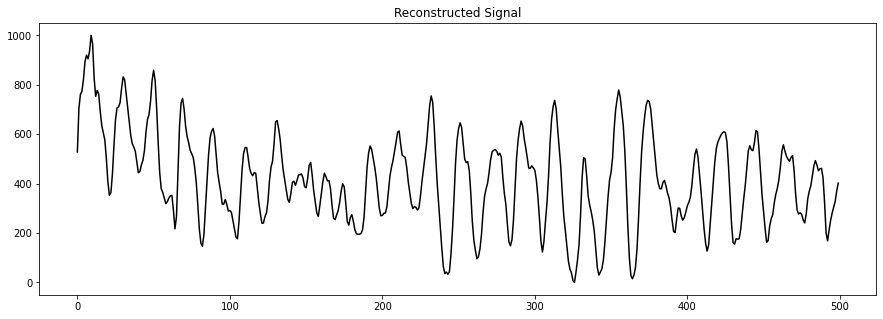

In [ ]:
Reconstructed = Reconstruct(data, compdata)
plt.figure(figsize= (15, 5))
plt.plot(Reconstructed[:, 0], Reconstructed[:, 1], c= 'black')
plt.title('Reconstructed Signal')

In [ ]:
Accuracy(compdata, data, Reconstructed)

CR: 1.9920318725099602
PRD: 0.0 %
